# Introcuction to Graphviz

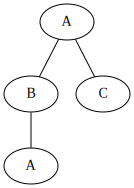

In [7]:
import graphviz
tree  = graphviz.Graph()
tree.node('0','A')
tree.node('1','B')
tree.node('2','C')
tree.node('3','A')

tree.edge('0', '1')
tree.edge('0', '2')
tree.edge('1', '3')
tree

## simple recursion

In [12]:
def extendTree(parent, n, edg=""):
    global uid
    uid = uid + 1
    tree.node(str(uid), str(n))
    if parent > 0:
        tree.edge(str(parent), str(uid), str(edg))
    return uid

In [22]:
def rec(n, parent):
    u = extendTree(parent, n)
    if n <= 0:
        return 1
    return rec(n-1, u)

1


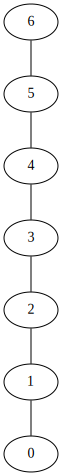

In [23]:
import graphviz
tree  = graphviz.Graph()
uid = 0
n = 6
print(rec(6, uid))
tree

## Fibnocci

In [34]:
def fib(n, parent, memo={}):
    u = extendTree(parent, n)
    if n in memo:
        return memo[n]
    if n == 0 or n == 1:
        return 1
    memo[n] = fib(n-1, u, memo) + fib(n-2, u, memo)
    return memo[n]

8


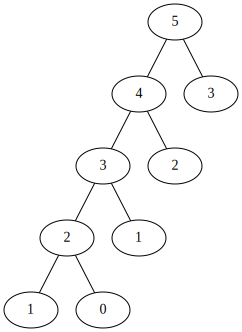

In [35]:
import graphviz
tree = graphviz.Graph()
uid = 0
print(fib(5, uid))
tree

## is Change Possible?

In [50]:
def isChangePossible(n, A, parent):
    u = extendTree(parent, n)
    if n == 0:
        return True
    if n < 0:
        return False
    ans = False
    for coin in A:
        ans = ans or isChangePossible(n - coin, A, u)
        #if ans == True:
        #    return True
    return ans

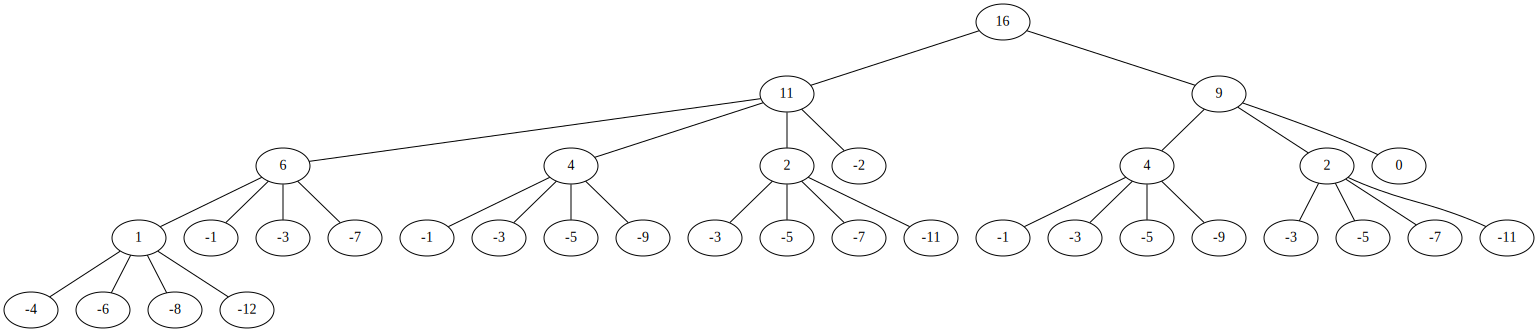

In [53]:
import graphviz
tree = graphviz.Graph()
uid = 0
n = 16
A = [5, 7, 9, 13]
isChangePossible(n, A, uid)
tree

## Least Number of Coins

In [21]:
def leastNum(n, A, parent, edg=""):
    u = extendTree(parent, n, edg)
    INF = float('inf')
    if n == 0:
        return 0
    if n < 0:
        return INF
    minCoins = INF
    for coin in A:
        minCoins = min(minCoins, leastNum(n - coin, A, u, coin) + 1)
    return minCoins

1


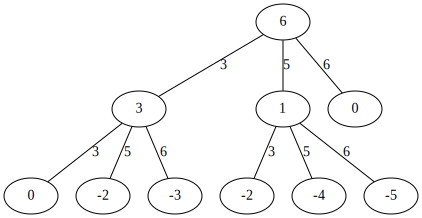

In [22]:
import graphviz
tree = graphviz.Graph()
uid = 0

n = 6
A = [3, 5, 6]
print(leastNum(n,A, uid))
tree

## minimum sum pairs(msp)

In [22]:
import numpy as np
def dist(x1,y1,x2,y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [23]:
def msp(word, parent):
    u = extendTree(parent, format(word, '0'+str(N)+'b'))
    if word == Full_word:
        return 0
    D = 1 << 30
    for i in range(N):
        if not(word & (1 << i)):
            break
    for j in range(i+1, N):
        if not(word & (1 << j)):
             D = min(D, d[i][j] + msp(word | (1<<i) | (1<<j), u))
    return D

8.182042498005464


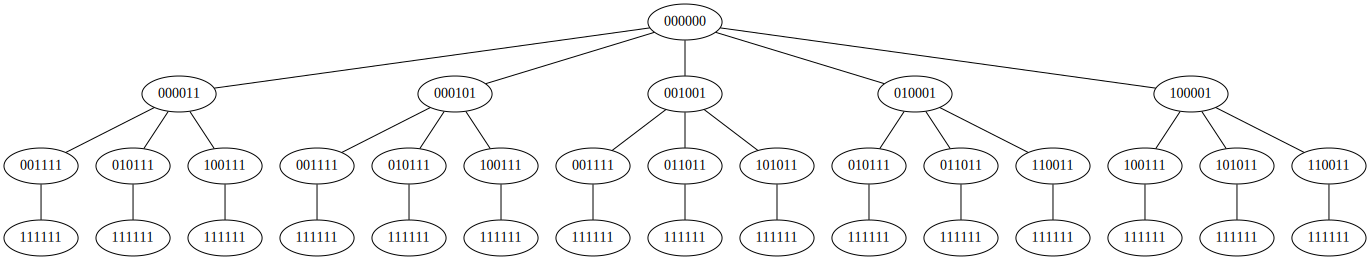

In [24]:
import graphviz
tree = graphviz.Graph()
uid = 0

n = 3
N = 2*n
x = [6, 8, 1, 3, 0, 7]
y = [7, 2, 1, 5, 4, 1]
d = [[0 for i in range(N)] for j in range(N)]
Full_word = (1 << N) - 1

def main():
    for i in range(N):
        for j in range(N):
            d[i][j] = dist(x[i], y[i], x[j], y[j])
    print(msp(0, uid))
main()
tree